In [1]:

# coding: utf-8


import glob
import os
import statsmodels
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf

%matplotlib inline

path = r"C:\Users\profile\Documents"
all_rec = glob.iglob(os.path.join(path, "*fixations.csv"), recursive=True)
dataframes = (pd.read_csv(f) for f in all_rec)
alldat = pd.concat(dataframes, ignore_index=False)


In [2]:
alldat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 10 columns):
id                 204 non-null int64
start_timestamp    204 non-null float64
duration           204 non-null float64
start_index        204 non-null int64
end_frame          204 non-null int64
norm_pos_x         204 non-null float64
norm_pos_y         204 non-null float64
dispersion         204 non-null float64
avg_pupil_size     204 non-null float64
confidence         204 non-null float64
dtypes: float64(7), int64(3)
memory usage: 16.0 KB


In [3]:
alldat.describe()

,id,start_timestamp,duration,start_index,end_frame,norm_pos_x,norm_pos_y,dispersion,avg_pupil_size,confidence
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,101.500000,81427.550456,0.536971,2213.127451,2227.911765,6.714871,-5.918578,0.711720,88.457482,0.626349
std,59.033889,44.503066,0.545815,1228.486278,1225.202479,24.397041,24.605545,0.278919,23.618566,0.388418
min,0.000000,81346.174000,0.151000,0.000000,6.000000,0.233362,-100.000000,0.000000,0.000000,0.000000
25%,50.750000,81393.174250,0.223500,1274.000000,1298.750000,0.343118,0.423439,0.591537,90.572135,0.234913
50%,101.500000,81432.882500,0.318000,2350.000000,2360.500000,0.355572,0.506779,0.778325,93.278276,0.825007
75%,152.250000,81464.158500,0.594500,3225.750000,3235.250000,0.374987,0.576130,0.952137,96.619307,0.994256
max,203.000000,81505.547000,3.841000,4406.000000,4434.000000,100.000000,0.662026,0.999935,109.247195,0.999596


In [4]:
alldat.head(5)

,id,start_timestamp,duration,start_index,end_frame,norm_pos_x,norm_pos_y,dispersion,avg_pupil_size,confidence
0,0,81346.174,0.375,0,6,0.353430,0.431713,0.645851,85.597662,0.997776
1,1,81347.446,0.152,31,36,0.597829,0.537449,0.591880,89.087003,0.999596
2,2,81347.860,0.300,43,51,0.345134,0.425346,0.525376,83.386324,0.997641
3,3,81348.215,0.242,53,58,0.422948,0.455449,0.427186,84.997460,0.998985
4,4,81348.514,0.536,60,72,0.416106,0.554891,0.646856,84.993374,0.998977


In [5]:
duration = alldat['duration']
confidence = alldat['confidence']
dispersion = alldat['dispersion']
pupsize = alldat['avg_pupil_size']
index = alldat['start_index']

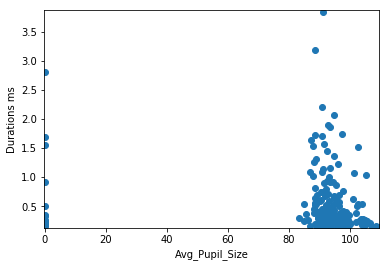

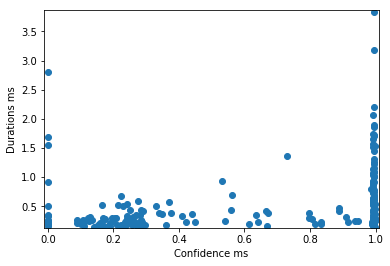

In [6]:
\
df_rand_plot = plt.scatter(x=pupsize, y=duration)
plt.xlabel('Avg_Pupil_Size')
plt.ylabel('Durations ms')
plt.margins(0.002)
plt.show()
\
\
df_rand_plot = plt.scatter(x=confidence, y=duration)
plt.xlabel('Confidence ms')
plt.ylabel('Durations ms')
plt.margins(0.002)
plt.show()
\

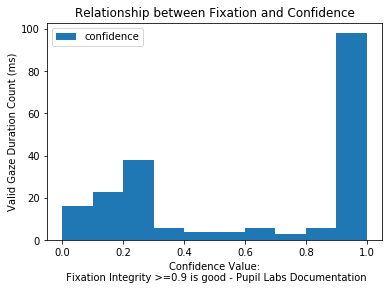

In [7]:
alldat.plot(x=("duration"), y=("confidence"),
                   kind="hist")

plt.ylabel('Valid Gaze Duration Count (ms)')
plt.xlabel('Confidence Value:\n Fixation Integrity >=0.9 is good - Pupil Labs Documentation')

plt.title('Relationship between Fixation and Confidence')
plt.show()
\

####### Data Normality Check #######
Compute mean and standard deviation: mu, sigma
######## Computation of Mean and CDF of fixation data in terms of durations #########
0.5369705882359423  = mean of fixation durations column from export
0.5444751197238394  = std_dev of fixtion column from export
88.45748200659035  = mean of avg pupil size column from export
23.560606542264566  = std_dev of avg. pupil size column from export
Using a randomly generated normal distribution of 1k data spread, 
 we can abstract a CDF 
for the mu and sigma values calculated as above
###### CDF of Fixation Data - Duration #######


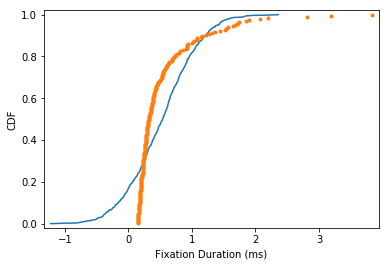

####### CDF of Fixation Data - Avg Pupil Size #######


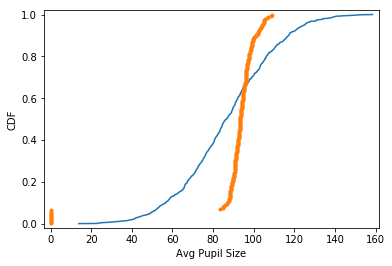

In [8]:

print("####### Data Normality Check #######")

print("Compute mean and standard deviation: mu, sigma")

print('######## Computation of Mean and CDF of fixation data in terms of durations #########')

mu = np.mean(duration)
sigma = np.std(duration)

print(mu, " = mean of fixation durations column from export")

print(sigma, " = std_dev of fixtion column from export")

mu2 = np.mean(pupsize)

sigma2 = np.std(pupsize)

print(mu2, " = mean of avg pupil size column from export")

print(sigma2, " = std_dev of avg. pupil size column from export")
\
\

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=1000)

samples2 = np.random.normal(mu2, sigma2, size=1000)

print("Using a randomly generated normal distribution of 1k data spread, \n we can abstract a CDF \nfor the mu and sigma values calculated as above")

# empirical cummulative distribution function

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y
\
\

# Get the CDF of the samples and of the data - Fixation Durations
\
print('###### CDF of Fixation Data - Duration #######')

x_theor, y_theor = ecdf(samples)
x, y = ecdf(duration)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Fixation Duration (ms)')
_ = plt.ylabel('CDF')
plt.show()

\
\

# Get the CDF of the samples2 and of the data - GazePosition

print('####### CDF of Fixation Data - Avg Pupil Size #######')

x_theor2, y_theor2 = ecdf(samples2)
x2, y2 = ecdf(pupsize)


# Plot the CDFs and show the plot
_ = plt.plot(x_theor2, y_theor2)
_ = plt.plot(x2, y2, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Avg Pupil Size')
_ = plt.ylabel('CDF')
plt.show()
\



 Calculating the Probability Dist. Function for Fixation < 0.5 

 We compute the fraction of fixations that are less than 0.5 seconds: prob


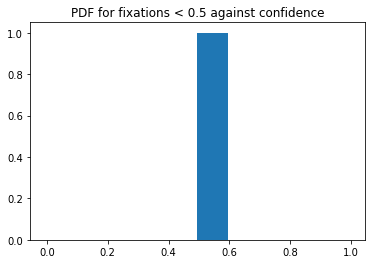


 PDF of full Fixation < 0.5: 0.495

 Calculating the Probability Dist. Function for Fixation >= 0.5 



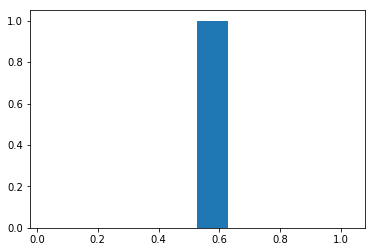


 PDF of full Fixation > 0.5: 0.528
 We can determine the successive poisson characteristic - i.e. total time between two poisson processes


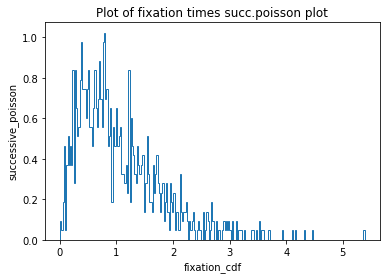


 Plot of fixation times succ.poisson plot



In [9]:
print('\n Calculating the Probability Dist. Function for Fixation < 0.5 \n')

prob_samples = np.random.normal(mu, sigma, size=1000)

print(' We compute the fraction of fixations that are less than 0.5 seconds: prob')

prob1 = np.sum(prob_samples < 0.5)/len(prob_samples)
plt.hist(prob1)
plt.title("PDF for fixations < 0.5 against confidence")
plt.show()

# Print the result
print('\n PDF of full Fixation < 0.5:', prob1)

print('\n Calculating the Probability Dist. Function for Fixation >= 0.5 \n')

prob2samples = np.random.normal(mu, sigma, size=1000)

# Compute the fraction of fixations that are more than 0.5 seconds: prob
prob2 = np.sum(prob2samples > 0.5)/len(prob2samples)
plt.hist(prob2, bins=10)
plt.show()

# Print the result
print('\n PDF of full Fixation > 0.5:', prob2)
\

print(" We can determine the successive poisson characteristic - i.e. total time between two poisson processes")
\

def successive_poisson(tau1, tau2, size=1):
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2


# Call samples of fixation: fixating_times
fixating_times = successive_poisson(0.6, 0.45, size=1000)

# Make the histogram
_ = plt.hist(fixating_times, density=True, histtype='step', bins=250)

# Label axes
plt.xlabel('fixation_cdf')
plt.ylabel('successive_poisson')
plt.title('Plot of fixation times succ.poisson plot')

# Show the plot
plt.show()

print('\n Plot of fixation times succ.poisson plot\n')


# ############## EDA- Duration_Confidence ########## #


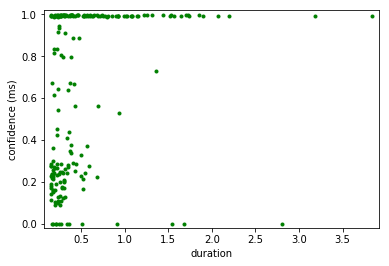

In [10]:
\
print('# ############## EDA- Duration_Confidence ########## #')

# Plot the fixation duration rate versus average pupil isze
_ = plt.plot(duration, confidence,
             scalex=True, scaley=True,
             marker='.', color='green', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('duration')
_ = plt.ylabel('confidence (ms)')

# Show the plot
plt.show()

# ##########   EDA- Duration_Pupilsize ########### #


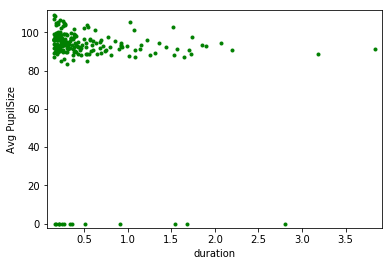

In [11]:

print('# ##########   EDA- Duration_Pupilsize ########### #')

# Plot the fixation duration rate versus average pupil isze
_ = plt.plot(duration, pupsize,
             scalex=True, scaley=True,
             marker='.', color='green', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('duration')
_ = plt.ylabel('Avg PupilSize')

# Show the plot
plt.show()



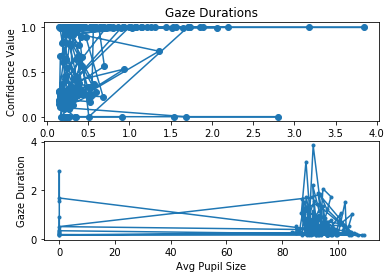

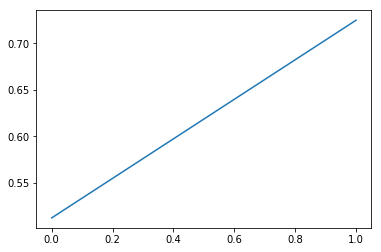

slope = 0.21307864150197667 .......
intercept = 0.5119324222752497 c


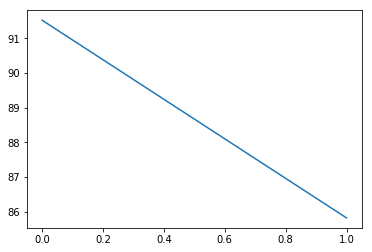

slope = -5.706641296310577 ...
intercept = 91.52178054032173 c


In [12]:
plt.subplot(2, 1, 1)
plt.plot(duration, confidence, 'o-')
plt.title('Gaze Durations')
plt.ylabel('Confidence Value')

plt.subplot(2, 1, 2)
plt.plot(pupsize, duration, '.-')
plt.xlabel('Avg Pupil Size')
plt.ylabel('Gaze Duration')

plt.show()


# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(duration, confidence, 1)

# theoretical line to plot
x = np.array([0, 1])
y = a * x + b

# Add regression line to plot
_ = plt.plot(x, y)

plt.show()

# Print the results to the screen
print('slope =', a, '.......')
print('intercept =', b, 'c')



# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(duration, pupsize, 1)

# theoretical line to plot
x = np.array([0, 1])
y = a * x + b

# Add regression line to plot
_ = plt.plot(x, y)

plt.show()

# Print the results to the screen
print('slope =', a, '...')
print('intercept =', b, 'c')

# ############## DATA BOOTSTRAP ################ #


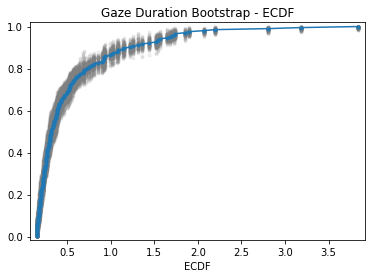

In [13]:
print("# ############## DATA BOOTSTRAP ################ #")

for _ in range(100):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(duration, len(duration))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(duration)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('fixation duration(ms)')
_ = plt.xlabel('ECDF')

# Show the plot
plt.title('Gaze Duration Bootstrap - ECDF')
plt.show()

\

def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D Data"""
    bs_sample = np.random.choice(data, len(data))

    return func(bs_sample)

# def boostrap_replicate_1d(data, func):  
#    return func(np.random.choice(data, size=len(data)))


def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# # COMPUTE MEAN & SEM OF BOOTSTRAP REPLICATES #### #
Ideally we take 10,000 bootstrap replicates of the mean: bs_replicates. However due to computational power constraints, we use a value of 1000 for now
Computing the Statistical Error of Mean Value SEM.
shows the spread that the mean of the original data sample
would have, if multiple samples of the variable fix_dur are taken
This is calculated using the bootstrapped data samples

 This is given by np.std(duration) / np.sqrt(len(duration)

0.038120883319902925


Standard Deviation of the Bootstrapped Data

0.04165626754698018


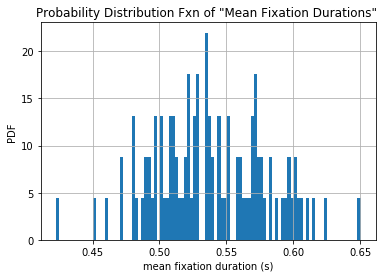

In [14]:

print("# # COMPUTE MEAN & SEM OF BOOTSTRAP REPLICATES #### #")

print("Ideally we take 10,000 bootstrap replicates of the mean: bs_replicates. However due to computational power constraints, we use a value of 1000 for now")

bs_replicates = draw_bs_reps(duration, np.mean, size=100)

print("Computing the Statistical Error of Mean Value SEM.")
print("shows the spread that the mean of the original data sample")
print("would have, if multiple samples of the variable fix_dur are taken")
print("This is calculated using the bootstrapped data samples\n")


print(" This is given by np.std(duration) / np.sqrt(len(duration)\n")
print(np.std(duration) / np.sqrt(len(duration)))

# Compute and print SD of the bootstrapped replicates (Data)
print("\n")
print("Standard Deviation of the Bootstrapped Data\n")
print(np.std(bs_replicates))

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=100, density=True)
_ = plt.xlabel('mean fixation duration (s)')
_ = plt.ylabel('PDF')
_ = plt.grid(True)
plt.title('Probability Distribution Fxn of "Mean Fixation Durations" ')
plt.show()


# ###  CALCULATING THE 'BOOTSTRAP' CONFIDENCE INTERVALS ##### #
Percentiles - Bootstrapped Data Conf. Intervals 25 - 97.5 = [0.46593615 0.61248566]
# ########### BOOTSTRAP OF VARIANCE ######## #
# Generate 1000 bootstrap replicates of the variance: bs_replicates


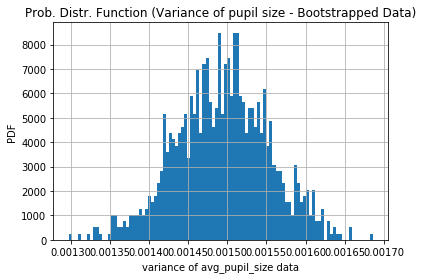

In [15]:
\
print("# ###  CALCULATING THE 'BOOTSTRAP' CONFIDENCE INTERVALS ##### #")

bs_percentiles = np.percentile(bs_replicates, [2.5, 97.5])

print('Percentiles - Bootstrapped Data Conf. Intervals 25 - 97.5 =', bs_percentiles)
\
\
print("# ########### BOOTSTRAP OF VARIANCE ######## #")

print('# Generate 1000 bootstrap replicates of the variance: bs_replicates')
bs_replicates2 = draw_bs_reps(confidence, np.var, size=1000)

# Put the variance in units of cm^2
bs_replicates2 /= 100

# Make a histogram of the results
_ = plt.hist(bs_replicates2, bins=100, density=True)
_ = plt.xlabel('variance of avg_pupil_size data')
_ = plt.ylabel('PDF')
_ = plt.grid(True)
# Show the plot
plt.title('Prob. Distr. Function (Variance of pupil size - Bootstrapped Data)')
plt.show()

In [16]:
print('# ###  BOOTSTRAP CONFIDENCE INTERVALS - VARIANCE ##### #')

bs_percentiles2 = np.percentile(bs_replicates2, [2.5, 97.5])

print('95% - Bootstrap Conf. Inter. Variance. =', bs_percentiles2, '...')
\
\

def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

# ###  BOOTSTRAP CONFIDENCE INTERVALS - VARIANCE ##### #
95% - Bootstrap Conf. Inter. Variance. = [0.00137416 0.00161023] ...


# ########## STATISTICAL PARAMETER ESTIMATION ########## #
# Draw out of an exponential distribution with parameter tau: inter_fixation_time


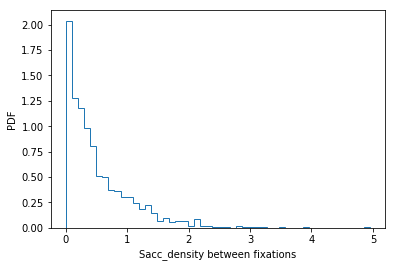

In [17]:
print('# ########## STATISTICAL PARAMETER ESTIMATION ########## #')

# Seed random number generator
np.random.seed(1000)

# Compute mean no-hitter time: tau
tau = np.mean(duration)

print('# Draw out of an exponential distribution with parameter tau: inter_fixation_time')
\
inter_fixation_time = np.random.exponential(tau, 1000)

# Plot the PDF and label axes
_ = plt.hist(inter_fixation_time,
             bins=50, density=True, histtype='step')
_ = plt.xlabel('Sacc_density between fixations')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

# ########## DOES THE DATA FOLLOW THE STORY??  ########### #


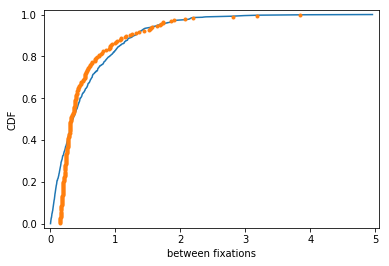

In [18]:
print('# ########## DOES THE DATA FOLLOW THE STORY??  ########### #')

# Create an ECDF from real data: x, y
x, y = ecdf(duration)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_fixation_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('between fixations')
plt.ylabel('CDF')

# Show the plot
plt.show()

\

# ########### SENSE CHECK! - is the parameter optimal? ########
Is the Parameter Optimal?


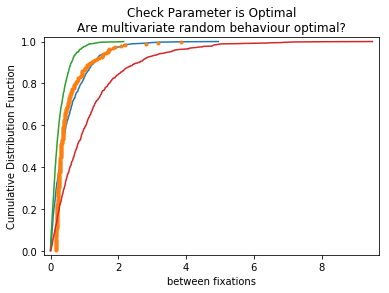

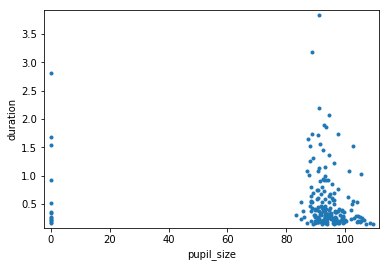

In [19]:
\
print('# ########### SENSE CHECK! - is the parameter optimal? ########')
print('Is the Parameter Optimal?')
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('between fixations')
plt.ylabel('Cumulative Distribution Function')

plt.title('Check Parameter is Optimal\nAre multivariate random behaviour optimal?')
# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, 1000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2*tau, 1000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

# Plot the fix_duration rate versus average pupil size
_ = plt.plot(pupsize, duration, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('pupil_size')
_ = plt.ylabel('duration')


slope = 0.42075780179780103 saccade density / percent fixations
intercept = 0.27342919753328054 avg.pupil_size density


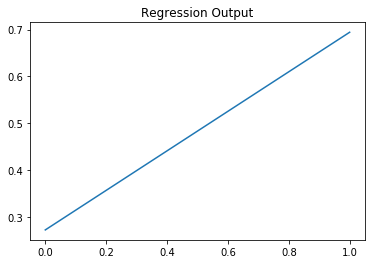

A negative correlation coefficient means that
for any two variables X and Y, an increase in X is associated
with a decrease in Y.
A negative correlation demonstrates a connection between two variables
in the same way a positive correlation coefficient does,
and the relative strengths are the same


In [20]:

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(confidence, duration, 1)

# Print the results to the screen
print('slope =', a, 'saccade density / percent fixations')
print('intercept =', b, 'avg.pupil_size density')

# Make theoretical line to plot
x = np.array([0, 1])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

_ = plt.title('Regression Output')
# Draw the plot
plt.show()
\
\
print("A negative correlation coefficient means that")
print("for any two variables X and Y, an increase in X is associated")
print("with a decrease in Y.")
print("A negative correlation demonstrates a connection between two variables")
print("in the same way a positive correlation coefficient does,")
print("and the relative strengths are the same")


# ###  PLOTTING BOOTSTRAPPED DATA REGRESSIONS ###### #


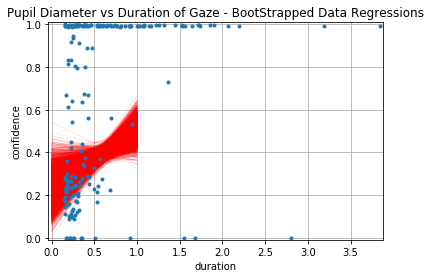

In [21]:
print('# ###  PLOTTING BOOTSTRAPPED DATA REGRESSIONS ###### #')

# Generate array of x-values for bootstrap lines: x
x = np.array([0, 10])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(draw_bs_pairs_linreg(duration, confidence, size=100),
                 linewidth=0.5, alpha=0.2, color='red')

#     _ = plt.plot(x, bs_slope_reps[i] * x + bs_intercept_reps[i],
#                 linewidth=0.5, alpha=0.2, color='red')

# draw_bs_pairs_linreg
# Plot the data
_ = plt.plot(duration, confidence, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('duration')
_ = plt.ylabel('confidence')
plt.margins(0.01)
plt.grid(True)
plt.title('Pupil Diameter vs Duration of Gaze - BootStrapped Data Regressions')
plt.show()
\
\

In [22]:

# ################### CORRELATIONS ##################
print('######  ######## CORRELATION PLOTS  ######### ########')
print('\n')
# dfmax = pd.DataFrame(alldat[duration, confidence, pupsize])
dfmax = pd.DataFrame(alldat[['duration', 'confidence', 'avg_pupil_size', 'dispersion']])
print(dfmax.head(5))

#%%
print('######  ########  "df.describe "# ########')
print('\n')
print(dfmax.describe())
print('\n')
# print(df.info)

print('###### Dataframe Correlation Figures "df.corr"  # ########')
print('\n')
dfmax.astype(float)
print(dfmax.corr())

print('\n', '\n')

print('#######################################')

print('Covariance Table')
dfmax.astype(float)
print(dfmax.cov())

######  ######## CORRELATION PLOTS  ######### ########


   duration  confidence  avg_pupil_size  dispersion
0     0.375    0.997776       85.597662    0.645851
1     0.152    0.999596       89.087003    0.591880
2     0.300    0.997641       83.386324    0.525376
3     0.242    0.998985       84.997460    0.427186
4     0.536    0.998977       84.993374    0.646856
######  ########  "df.describe "# ########


         duration  confidence  avg_pupil_size  dispersion
count  204.000000  204.000000      204.000000  204.000000
mean     0.536971    0.626349       88.457482    0.711720
std      0.545815    0.388418       23.618566    0.278919
min      0.151000    0.000000        0.000000    0.000000
25%      0.223500    0.234913       90.572135    0.591537
50%      0.318000    0.825007       93.278276    0.778325
75%      0.594500    0.994256       96.619307    0.952137
max      3.841000    0.999596      109.247195    0.999935


###### Dataframe Correlation Figures "df.corr"  # ########


 

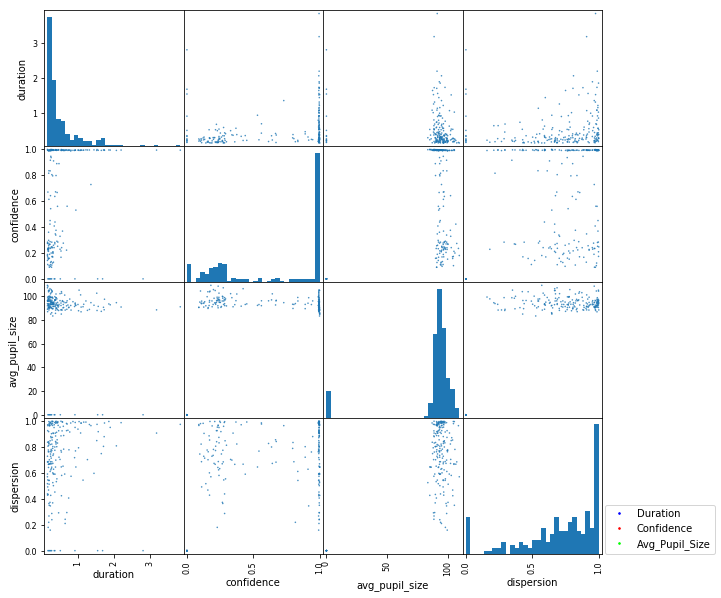

In [23]:
print('\n')
fig1 = pd.plotting.scatter_matrix(dfmax, marker='.',
    hist_kwds={'bins':30}, s=10, alpha=.8, cmap='brg', figsize=(10, 10))

handles = [plt.plot([],[],color=plt.cm.brg(i/2.), ls="", marker=".", \
                    markersize=np.sqrt(10))[0] for i in range(3)]
labels=["Duration", "Confidence", "Avg_Pupil_Size"]
plt.legend(handles, labels, loc=(1.02,0))
plt.show()

################### AUTOCORRELATION ####################


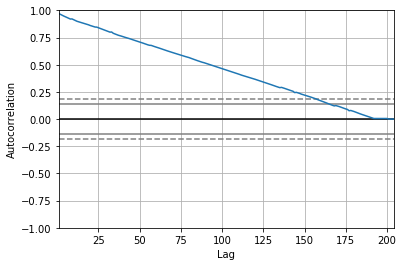

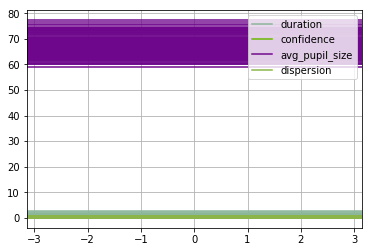

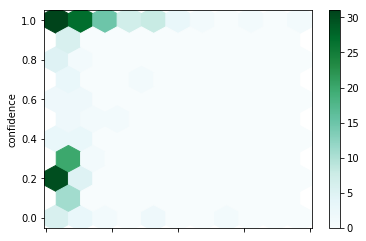

<Figure size 1080x720 with 0 Axes>

In [24]:
print('################### AUTOCORRELATION ####################')
\
\
fig2 = pd.plotting.autocorrelation_plot(dfmax)
# fig2.layout(tight)
plt.show()

fig3 = pd.plotting.andrews_curves(pd.melt(dfmax), 'variable')

plt.show()
\
dfmax.plot.hexbin(x='duration', y='confidence', gridsize=10)
plt.figure(figsize=(15,10))
plt.show()

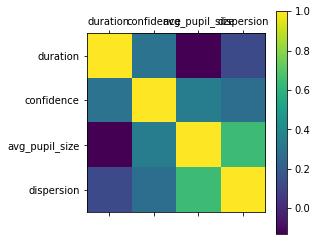

<Figure size 1800x1800 with 0 Axes>

In [25]:
\
plt.matshow(dfmax.corr())
plt.xticks(range(len(dfmax.columns)), dfmax.columns)
plt.yticks(range(len(dfmax.columns)), dfmax.columns)
plt.colorbar()
plt.figure(figsize=(25,25))
plt.show()

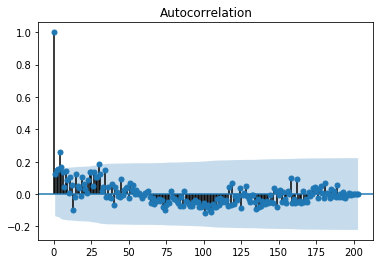

<Figure size 1080x720 with 0 Axes>

<function matplotlib.pyplot.show(*args, **kw)>

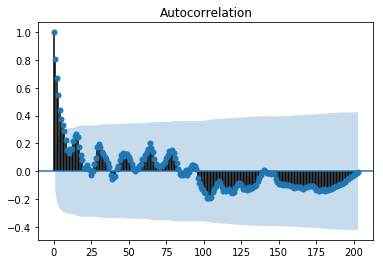

<Figure size 1080x720 with 0 Axes>

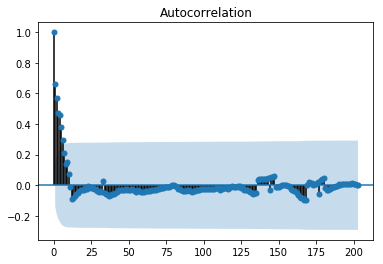

<Figure size 1080x720 with 0 Axes>

In [26]:
plot_acf(duration)
plt.figure(figsize=(15,10))
plt.show()

plot_acf(confidence)
plt.figure(figsize=(15,10))
plt.show

plot_acf(pupsize)
plt.figure(figsize=(15,10))
plt.show